In [1]:
from htke.load_data import *
from htke.process_ir_data import *
from htke.load_conditions import *
from htke.spka import *
from htke.rpka import *
pd.options.mode.chained_assignment = None  # default='warn' stops the slice error

### Go to directory

In [2]:
%pwd
%cd ir_data/GL-06-53-4

C:\Users\Paul Dingwall\Documents\github\htke\ir_data\GL-06-53-4


### Load Raw Data

<AxesSubplot:xlabel='Relative Time'>

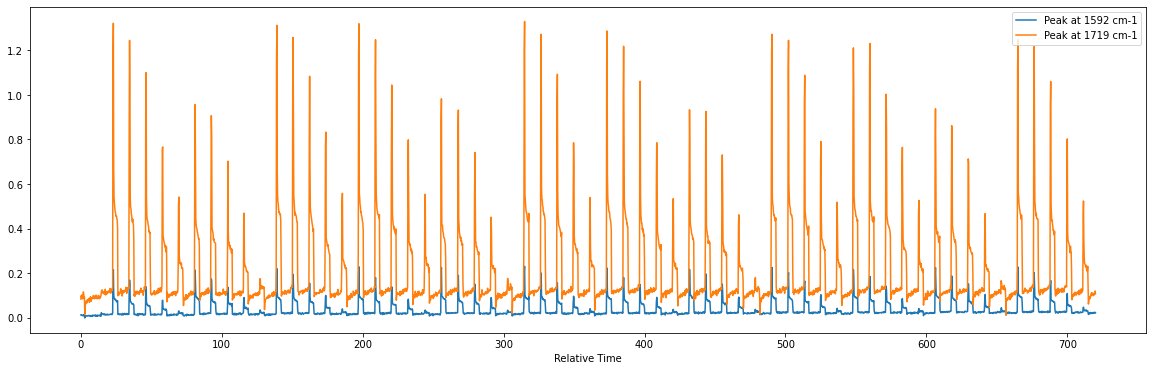

In [3]:
# Instantiate class
Data()

# Load data to dataframe
ir_data = Data.read()

# Visualise the data
Data.plot(ir_data)

#ir_data

### Find the Peaks in the Raw Data

In [4]:
# List all the wavelengths observed
print([col for col in ir_data.columns if 'Peak' in col])

['Peak at 1592 cm-1', 'Peak at 1719 cm-1']


In [5]:
# Choose peak
peak_of_interest = 'Peak at 1592 cm-1'

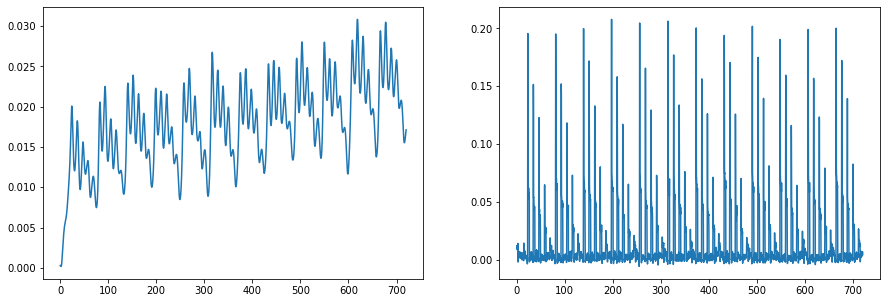

In [6]:
# Correct Baseline (needed if using area data)
correction = Data.baseline_correction(ir_data[peak_of_interest], peak_of_interest)

ir_data[peak_of_interest] = ir_data[peak_of_interest] - correction

# Plot it to see
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.plot(ir_data['Relative Time'], correction)
ax2.plot(ir_data['Relative Time'], ir_data['Peak at 1592 cm-1'])

In [7]:
# Instantiate class
peaks = Peaks(ir_data)

# Auto find prominence and height to match number of conditions
prominence, no_reactions = peaks.auto_prom(peak_of_interest)
height = peaks.auto_height(peak_of_interest)
residence_time = peaks.auto_area(peak_of_interest, prominence, no_reactions, 10)

print('There are', no_reactions, 'reactions')
print('Prominence threshold =', np.round(prominence, 4))
print('Height threshold =', np.round(height, 4))
print('Residence time =', np.round(residence_time, 2))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encou

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encou

There are 12 reactions
Prominence threshold = 0.0164
Height threshold = 1.0
Residence time = 4.44


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encou

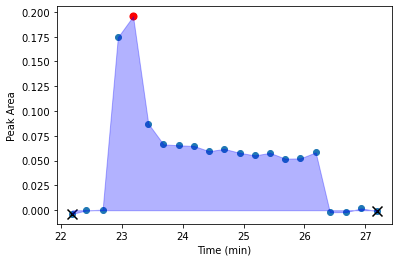

0


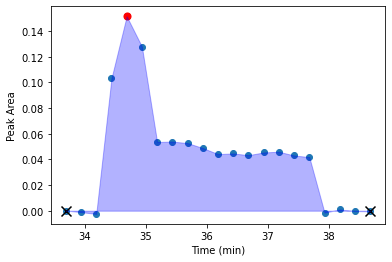

1


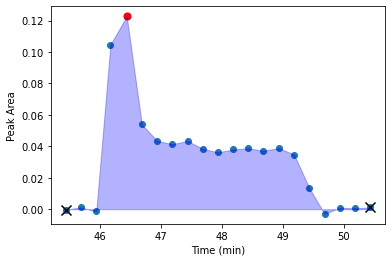

2


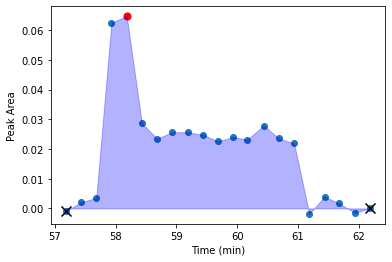

3


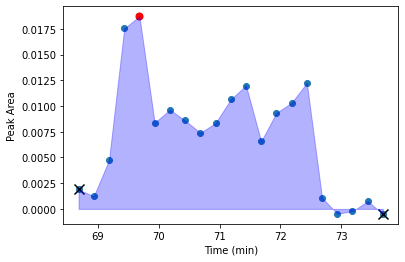

4


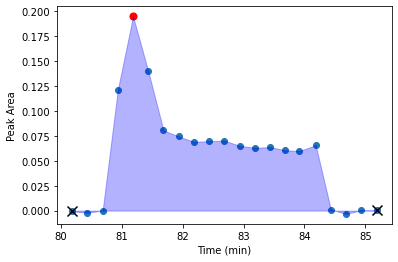

5


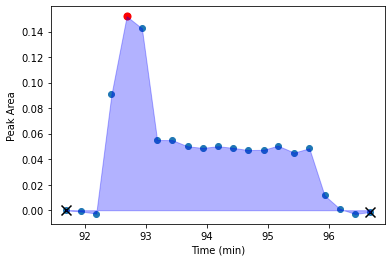

6


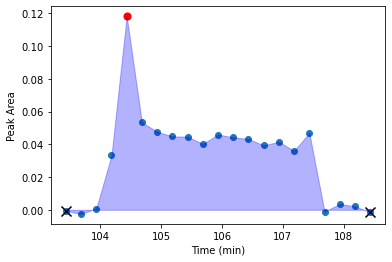

7


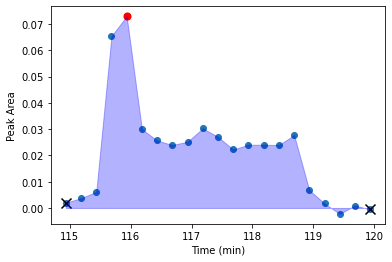

8


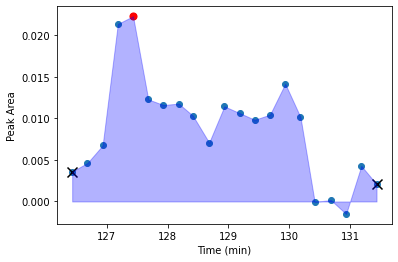

9


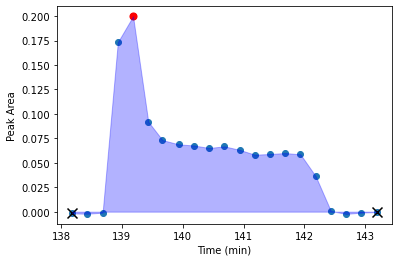

10


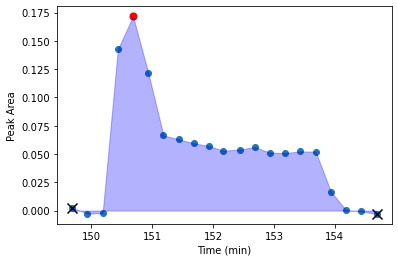

11


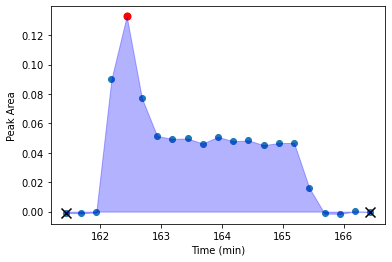

12


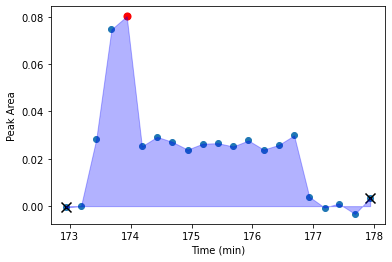

13


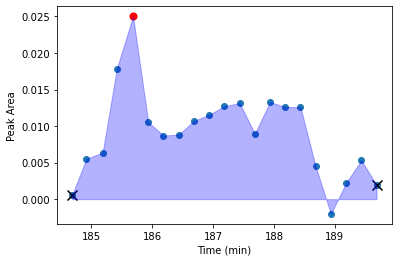

14


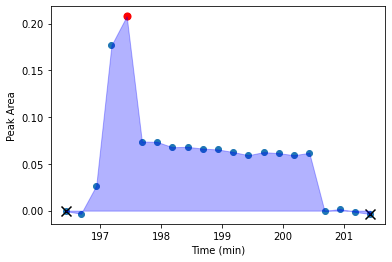

15


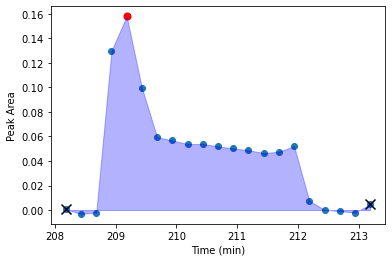

16


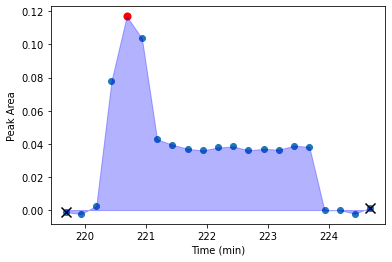

17


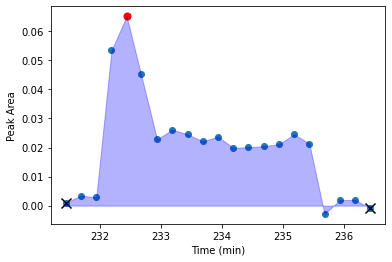

18


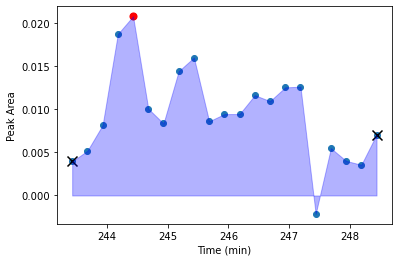

19


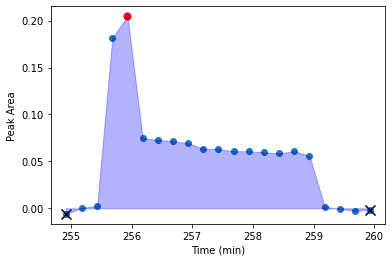

20


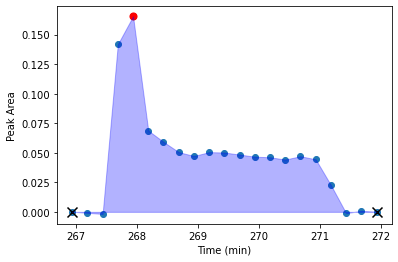

21


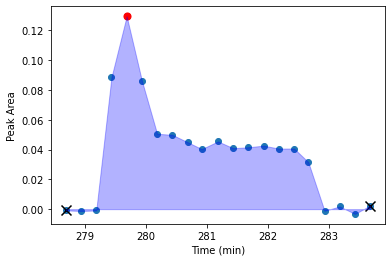

22


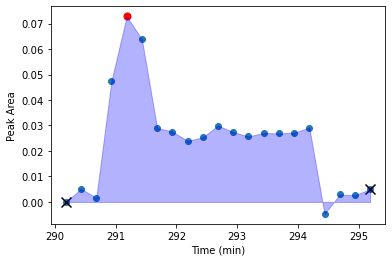

23


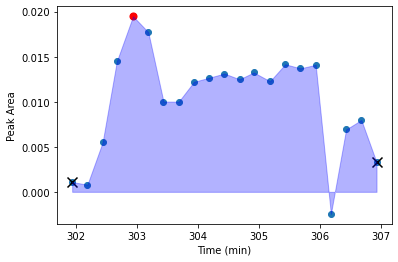

24


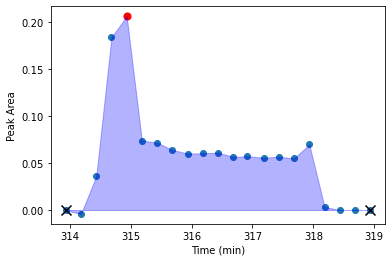

25


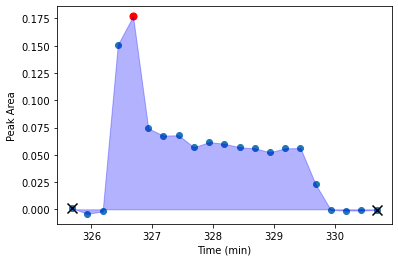

26


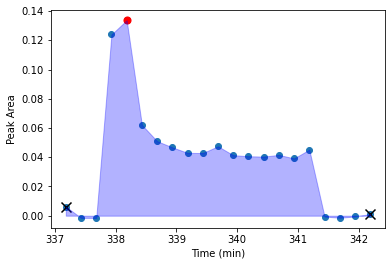

27


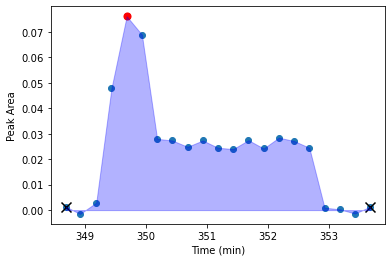

28


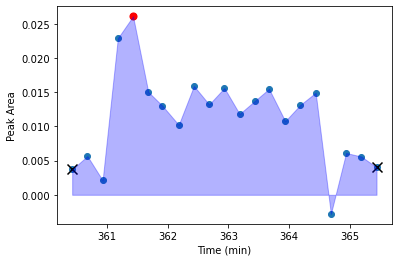

29


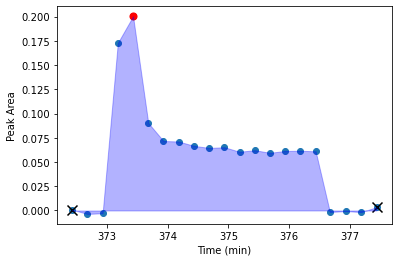

30


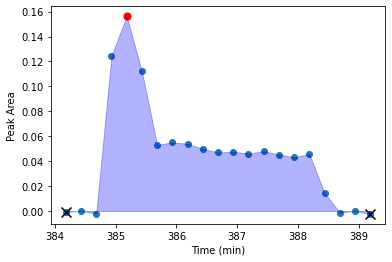

31


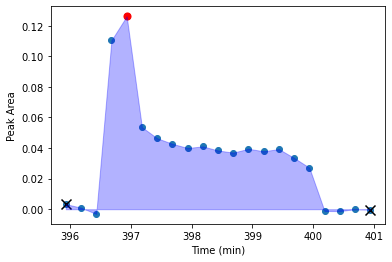

32


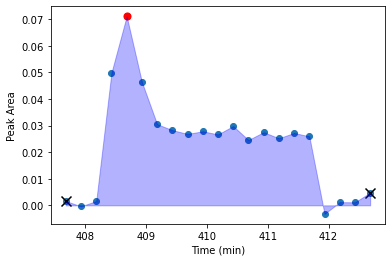

33


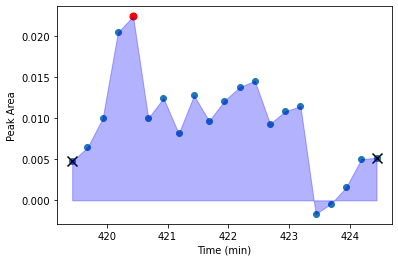

34


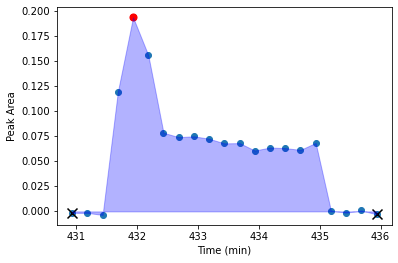

35


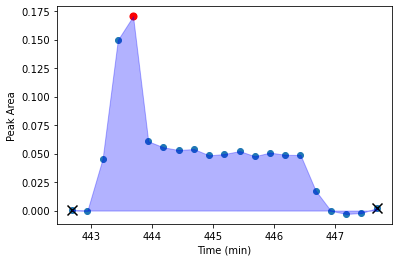

36


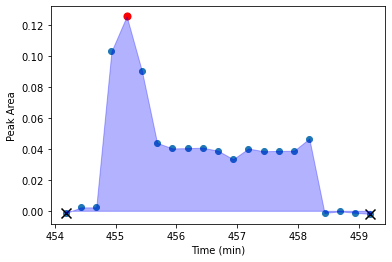

37


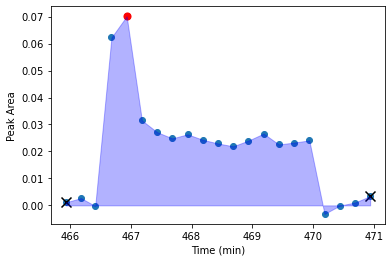

38


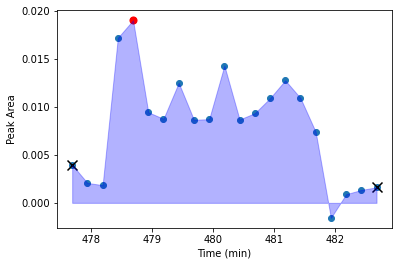

39


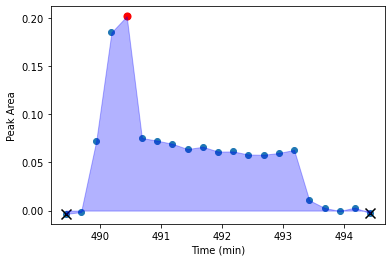

40


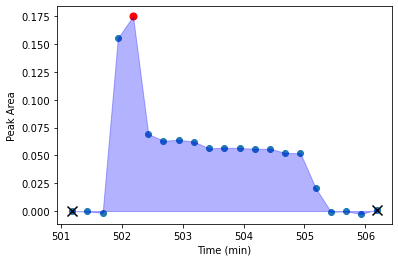

41


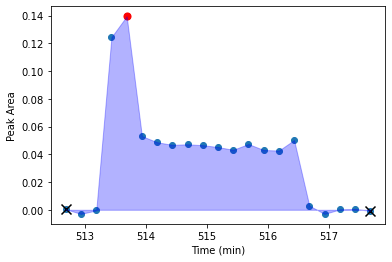

42


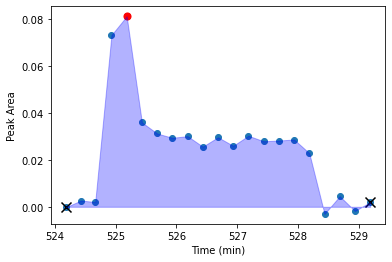

43


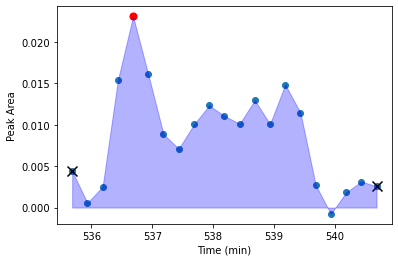

44


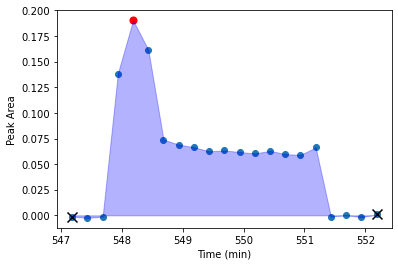

45


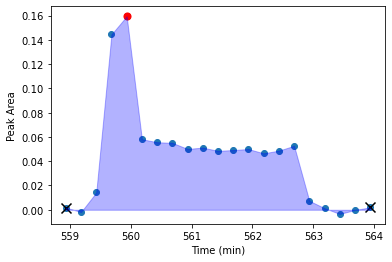

46


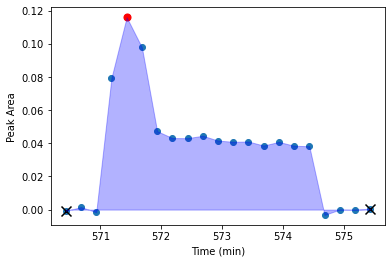

47


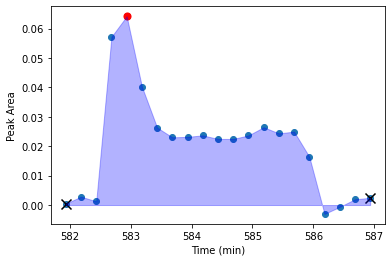

48


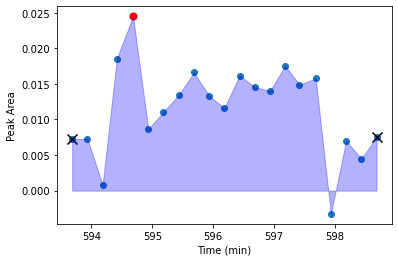

49


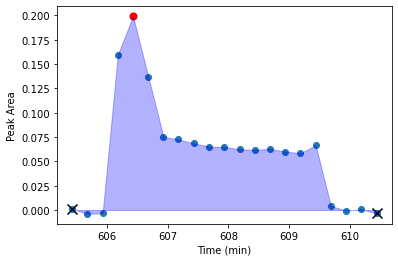

50


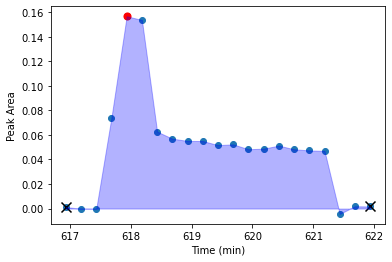

51


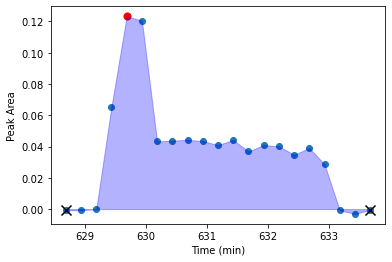

52


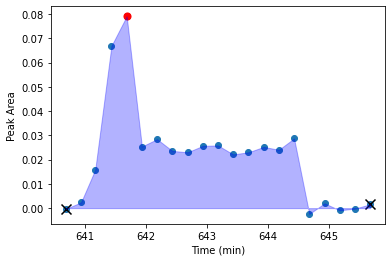

53


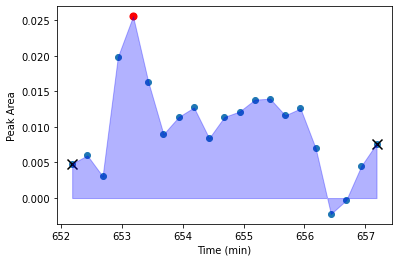

54


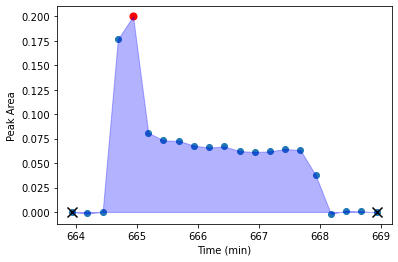

55


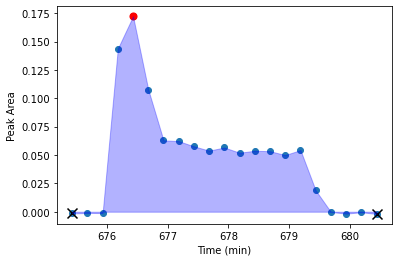

56


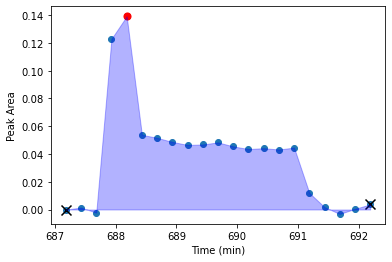

57


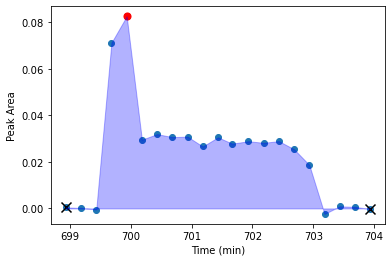

58


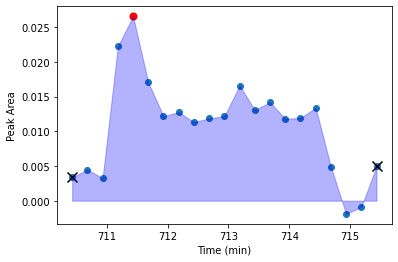

59


In [8]:
# Set some variables
points_per_reaction = 5
time_adjust_before = 1
time_adjust_after = 2

# For loop to see all areas
for var in range(0, no_reactions * points_per_reaction):
    peaks.exp_area_sp(prominence, residence_time, peak_of_interest, time_adjust_before, time_adjust_after, var)
    print(var)

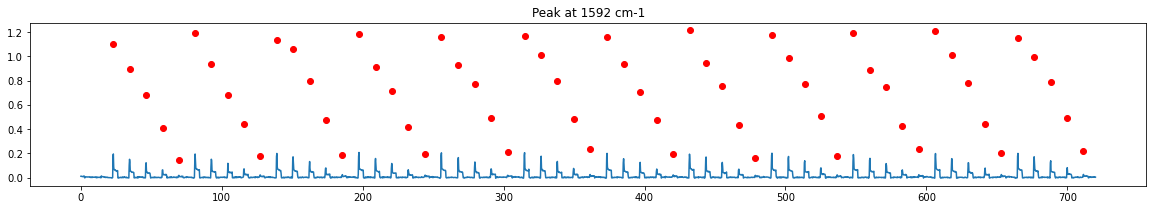

In [10]:
## PROMINENCE ALL WAVELENGTHS: Determine the peak prominences of every wavelength
#processed_ir_data = peaks.prominence_all(prominence)

## PROMINENCE: Determine the peak prominences of a single wavelength
#processed_ir_data = peaks.prominence(prominence, peak_of_interest)

## HEIGHT: # Determine the peak heights of a single wavelength
#processed_ir_data = peaks.height(height, peak_of_interest)

## EXP AREA: Determine the experimental areas of a single wavelength
processed_ir_data = peaks.exp_area(prominence, residence_time, peak_of_interest, time_adjust_before, time_adjust_after)

## FITTED AREA: Determine the fitted areas of a single wavelength
#processed_ir_data = peaks.fitted_area(prominence, residence_time, peak_of_interest, time_adjust_before, time_adjust_after)

## Visualise which peaks have been picked - single peak
peaks.plot(processed_ir_data, peak_of_interest)

## Compare prominence, height, experimental area, and fitted area
#r2, compare = peaks.compare_no_height(prominence, residence_time, peak_of_interest, no_reactions, points_per_reaction, time_adjust_before, time_adjust_after)
# NOTE: Areas seem to give the best value when the starting point is exactly on the peak (no baseline before)

#processed_ir_data
#r2

### Smooth the data

#### Average t0s

In [11]:
processed_ir_data = peaks.t0_correction(processed_ir_data, no_reactions, points_per_reaction)

#### Apply linear smoothing

In [12]:
processed_ir_data = peaks.linear_correction(processed_ir_data, no_reactions, points_per_reaction)

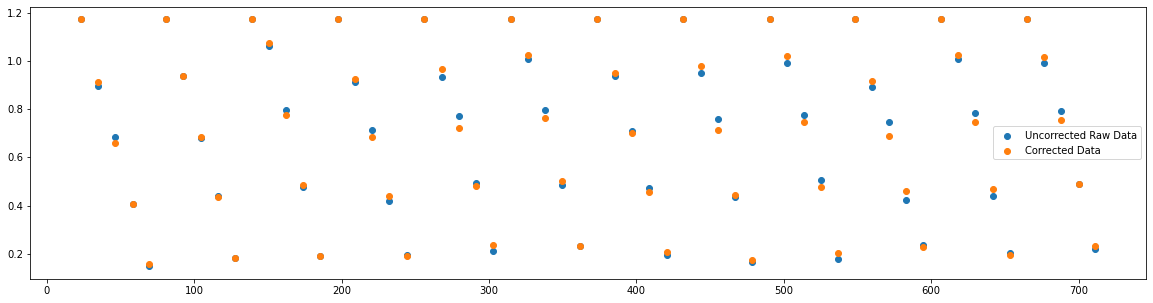

In [13]:
plt.figure(figsize=(20,5))
plt.scatter(processed_ir_data['Relative Time'], processed_ir_data['Raw Peak Property'], label = 'Uncorrected Raw Data')
plt.scatter(processed_ir_data['Relative Time'], processed_ir_data['Peak Property'], label = 'Corrected Data')
plt.legend()
plt.show()

# How SPKA is Calculated: One line at a time

In [14]:
# Read excel sheet
conditions = pd.read_excel("Conditions.xlsx") 
conditions

,Experiment,A,B,C,[A]0,[B]0,[C]0,SPKA,Initial Conv,Interval Size,tR (min)
0,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,5,20,30,11.4
1,Exp1 - R2,A1,B1,C1,0.1,0.10,0.02,5,20,30,11.4
2,Exp1 - R3,A1,B1,C1,0.1,0.15,0.01,5,20,30,11.4
3,Exp1 - R4,A1,B1,C1,0.1,0.15,0.02,5,20,30,11.4
4,Exp1 - R5,A1,B1,C1,0.1,0.10,0.02,5,20,30,11.4
5,Exp1 - R6,A1,B1,C1,0.1,0.15,0.01,5,20,30,11.4
6,Exp1 - R7,A1,B1,C1,0.1,0.15,0.02,5,20,30,11.4
7,Exp1 - R8,A1,B1,C1,0.1,0.10,0.02,5,20,30,11.4
8,Exp1 - R9,A1,B1,C1,0.1,0.15,0.01,5,20,30,11.4
9,Exp1 - R10,A1,B1,C1,0.1,0.15,0.02,5,20,30,11.4


In [15]:
# Expand SPKA conditions for each reaction
experiments = conditions['Experiment'].unique()
experiments

array(['Exp1 - R1', 'Exp1 - R2', 'Exp1 - R3', 'Exp1 - R4', 'Exp1 - R5',
       'Exp1 - R6', 'Exp1 - R7', 'Exp1 - R8', 'Exp1 - R9', 'Exp1 - R10',
       'Exp1 - R11', 'Exp1 - R12'], dtype=object)

In [18]:
var = experiments[0]

In [19]:
# For single reaction
tmp = conditions.loc[conditions['Experiment'] == var]
tmp

,Experiment,A,B,C,[A]0,[B]0,[C]0,SPKA,Initial Conv,Interval Size,tR (min)
0,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,5,20,30,11.4


In [20]:
# Find interval size
interval_size = tmp['Interval Size'].iloc[0]
interval_size

30

In [21]:
# Find initial converison (note: 0% always the first, this applies to the second point)
initial_conv = tmp['Initial Conv'].iloc[0]
initial_conv

20

In [22]:
# Experiments will always start at 0% conversion
spka_start = [0]

In [23]:
# The next point will start at the specified 'Initial Conversion' and go up by 'Interval Size' * number of SPKA points - 2 (-1 for t0 and -1  as must be one less than in excel)
spka_points = [tmp['Initial Conv'].iloc[0] + tmp['Interval Size'].iloc[0] * x for x in range(0, tmp['SPKA'].iloc[0] - 2)]
spka_points

[20, 50, 80]

In [24]:
spka = pd.DataFrame(spka_start + spka_points, columns = ['SPKA'])
spka

,SPKA
0,0
1,20
2,50
3,80


In [142]:
# This is the new bit to add above
start = 10
no_loops = 3
interval = 23

for x in range(0, no_loops):
    print(start + interval * x)

10
33
56


In [74]:
[start + interval * x for x in range(0, no_loops)]

[10, 33, 56]

# For Loop

In [25]:
# Expand SPKA conditions for each reaction
experiments = conditions['Experiment'].unique()

data=[]
for var in experiments:

    # For single reaction
    tmp = conditions.loc[conditions['Experiment'] == var]

    # Experiments will always start at 0% conversion
    spka_start = [0]

    # Create and append df for each SPKA datapoint
    # The next point will start at the specified 'Initial Conversion' and go up by 'Interval Size' * number of SPKA points - 2 (-1 for t0 and -1  as must be one less than in excel)
    spka_points = [tmp['Initial Conv'].iloc[0] + tmp['Interval Size'].iloc[0] * x for x in range(0, tmp['SPKA'].iloc[0] - 2)]

    # Make sure it starts at spka_start
    spka = pd.DataFrame(spka_start + spka_points, columns = ['SPKA'])

    # Add this to the dataframe
    tmp = tmp.drop(['SPKA'],axis=1) # drop manually filled column
    tmp = tmp.append(spka, ignore_index=True).ffill()

    # Take first row as t0 conditions and duplicate
    t0_cond = pd.DataFrame(tmp.iloc[0,:]).T
    pd.concat([t0_cond,tmp]).reset_index()

    data.append(tmp)

In [94]:
# Make sure the function works

def read(processed_ir_data):
    
    # Read excel sheet
    conditions = pd.read_excel("Conditions.xlsx")  

    # Expand SPKA conditions for each reaction
    experiments = conditions['Experiment'].unique()
    
    data=[]
    for var in experiments:

        # For single reaction
        tmp = conditions.loc[conditions['Experiment'] == var]

        # Experiments will always start at 0% conversion
        spka_start = [0]

        # Create and append df for each SPKA datapoint
        # The next point will start at the specified 'Initial Conversion' and go up by 'Interval Size' * number of SPKA points - 2 (-1 for t0 and -1  as must be one less than in excel)
        spka_points = [tmp['Initial Conv'][0] + tmp['Interval Size'][0] * x for x in range(0, tmp['SPKA'][0] - 2)]

        # Make sure it starts at spka_start
        spka = pd.DataFrame(spka_start + spka_points, columns = ['SPKA'])

        # Add this to the dataframe
        tmp = tmp.drop(['SPKA'],axis=1) # drop manually filled column
        tmp = tmp.append(spka, ignore_index=True).ffill()

        # Take first row as t0 conditions and duplicate
        t0_cond = pd.DataFrame(tmp.iloc[0,:]).T
        pd.concat([t0_cond,tmp]).reset_index()

        data.append(tmp)

    processed_conditions=pd.concat(data).reset_index(drop=True).fillna(value='0')

    # Check that you have the same number of peaks as experimental conditions
    if len(processed_ir_data) != len(processed_conditions):
        print('You have a problem: IR datapoints = ',len(processed_ir_data),', Number of conditions = ',len(processed_conditions))
    else:
        print('Inputs seem good: IR Datapoints = ',len(processed_ir_data),', Number of conditions = ',len(processed_conditions))

    # Merge IR and Conditions dataframes
    experimental_data = pd.concat([processed_conditions,processed_ir_data],axis=1)

    return experimental_data

In [ ]:
data=[]
for var in experiments:

    # For single reaction
    tmp = conditions.loc[conditions['Experiment'] == var]

    # Find interval size
    interval_size = tmp['Interval Size'].iloc[0]

    # Create and append df for each SPKA datapoint
    spka_points = pd.DataFrame(range(0,tmp['SPKA'].iloc[0] - 1), columns=['SPKA']) * interval_size # Must be one less than in excel sheet
    tmp = tmp.drop(['SPKA'],axis=1) # drop manually filled column
    tmp = tmp.append(spka_points, ignore_index=True).ffill()

    # Take first row as t0 conditions and duplicate
    t0_cond = pd.DataFrame(tmp.iloc[0,:]).T
    pd.concat([t0_cond,tmp]).reset_index()

    data.append(tmp)

processed_conditions=pd.concat(data).reset_index(drop=True).fillna(value='0')

# Check that you have the same number of peaks as experimental conditions
if len(processed_ir_data) != len(processed_conditions):
    print('You have a problem: IR datapoints = ',len(processed_ir_data),', Number of conditions = ',len(processed_conditions))
else:
    print('Inputs seem good: IR Datapoints = ',len(processed_ir_data),', Number of conditions = ',len(processed_conditions))

# Merge IR and Conditions dataframes
experimental_data = pd.concat([processed_conditions,processed_ir_data],axis=1)

return experimental_data

# Read experimental conditions and add to dataframe

In [26]:
Conditions()
experimental_data = Conditions.read(processed_ir_data)
#experimental_data

Inputs seem good: IR Datapoints =  60 , Number of conditions =  60


### Create the SPKA profiles

### Line by line

In [33]:
reaction_list = experimental_data['Experiment'].unique()
reaction_list

array(['Exp1 - R1', 'Exp1 - R2', 'Exp1 - R3', 'Exp1 - R4', 'Exp1 - R5',
       'Exp1 - R6', 'Exp1 - R7', 'Exp1 - R8', 'Exp1 - R9', 'Exp1 - R10',
       'Exp1 - R11', 'Exp1 - R12'], dtype=object)

In [39]:
sm_monitored = '[A]0'
var = 0
reaction = reaction_list[var]
reaction

'Exp1 - R1'

In [44]:
# Just single reaction
tmp = experimental_data.loc[experimental_data['Experiment'] == reaction]
tmp

,Experiment,A,B,C,[A]0,[B]0,[C]0,Initial Conv,Interval Size,tR (min),SPKA,Relative Time,Peak Property,Method,Raw Peak Property
0,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,0,23.183333,1.171826,experimental area,1.171826
1,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,0,34.683333,0.912389,experimental area,0.894949
2,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,20,46.433333,0.658690,experimental area,0.684538
3,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,50,58.183333,0.404990,experimental area,0.405811
4,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,80,69.683333,0.156688,experimental area,0.147459


In [45]:
# Normalise the IR concentration against the t0 value, set to ideal concentration
norm_ir_conc = tmp['Peak Property'] / tmp['Peak Property'].iloc[0] * tmp[sm_monitored].iloc[0]
norm_ir_conc

0    0.100000
1    0.077860
2    0.056211
3    0.034561
4    0.013371
Name: Peak Property, dtype: float64

In [46]:
# Drop the first row as this is t0 data and should not be part of the SPKA profile
tmp.drop(index=tmp.index[0], axis=0, inplace = True)
tmp

,Experiment,A,B,C,[A]0,[B]0,[C]0,Initial Conv,Interval Size,tR (min),SPKA,Relative Time,Peak Property,Method,Raw Peak Property
1,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,0,34.683333,0.912389,experimental area,0.894949
2,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,20,46.433333,0.658690,experimental area,0.684538
3,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,50,58.183333,0.404990,experimental area,0.405811
4,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,80,69.683333,0.156688,experimental area,0.147459


In [47]:
# Calculate the SPKA Conversion
spka_conv = 1 - (tmp['SPKA'])/100
spka_conv

1      1
2    0.8
3    0.5
4    0.2
Name: SPKA, dtype: object

In [49]:
# Calculate the ideal starting concentration for each datapoint
# Change this if have the actual t0s for each datapoint
spka_ideal_conc = spka_conv * tmp[sm_monitored]
spka_ideal_conc

1     0.1
2    0.08
3    0.05
4    0.02
dtype: object

In [50]:
# Add these to dataframe
tmp['SPKA Conversion'] = spka_conv
tmp['SPKA Ideal t0 Concentration'] = spka_ideal_conc

# Find the residence time
residence_time = tmp['tR (min)'].iloc[0]

In [55]:
# Calculate the SPKA rate data
spka_rate = (spka_ideal_conc - norm_ir_conc[1:]) / residence_time
spka_rate

1    0.00498897
2    0.00536077
3    0.00347915
4    0.00149373
dtype: object

In [52]:
# Calculate the SPKA concentration data
spka_conc = (spka_ideal_conc - norm_ir_conc) / 2 + norm_ir_conc
spka_conc

0          NaN
1    0.0889302
2    0.0681053
3    0.0422803
4    0.0166857
dtype: object

In [54]:
norm_ir_conc[1:]

1    0.077860
2    0.056211
3    0.034561
4    0.013371
Name: Peak Property, dtype: float64

In [27]:
spka = SPKA(experimental_data)

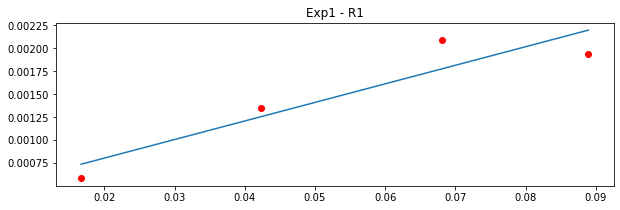

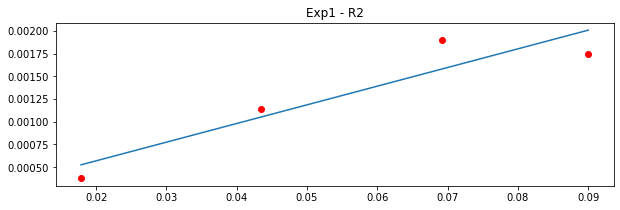

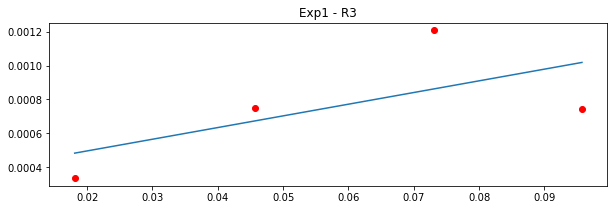

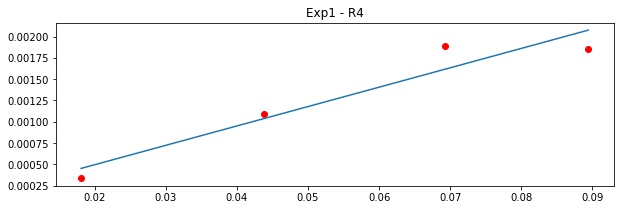

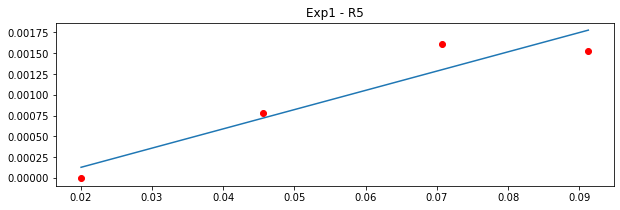

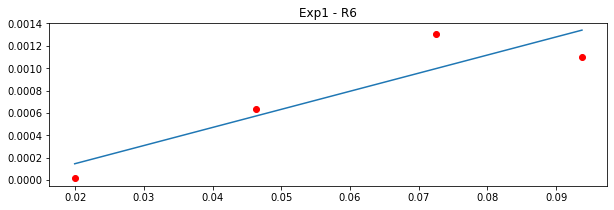

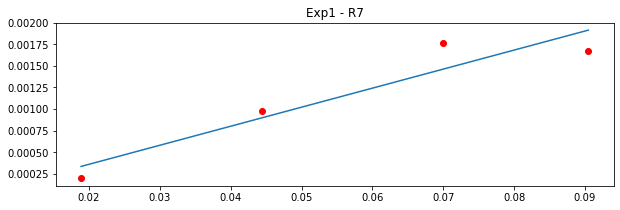

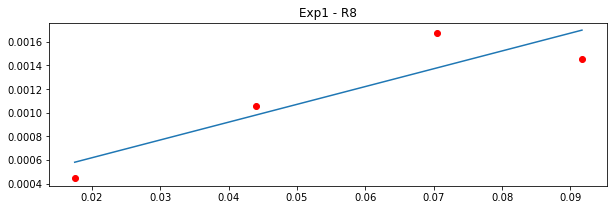

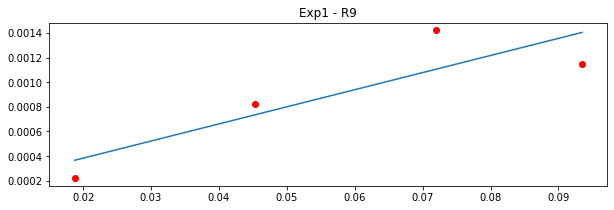

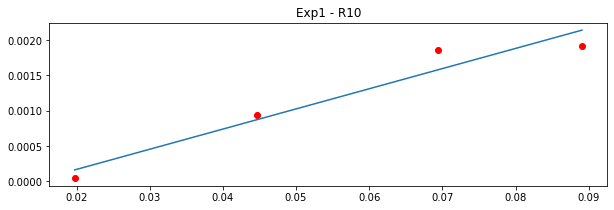

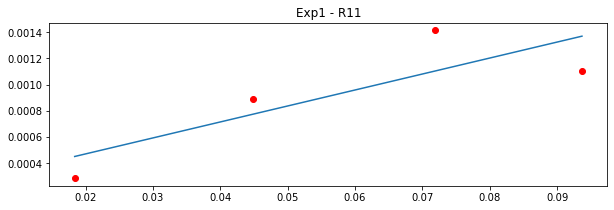

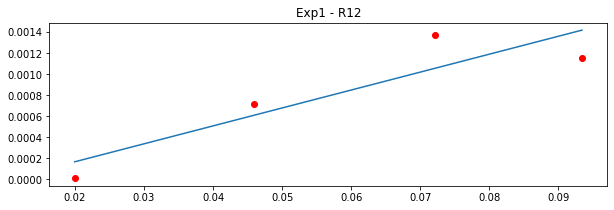

In [28]:
spka_data = spka.spka('[A]0')
#spka_data
spka.plot(spka_data)

## To Compare - must use Conditions.read(compare)
#r2 = spka.compare('[A]0')
#r2

### Perform RPKA

In [168]:
rpka = RPKA(spka_data)

KeyError: '[Raw Peak Propert]'

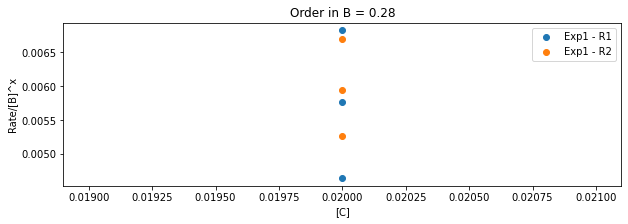

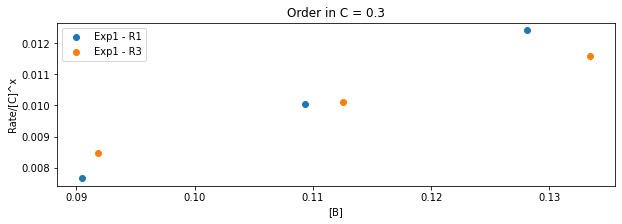

In [169]:
rpka_data = rpka.diff_excess()
#rpka_data

In [25]:
# Set up excelwriter
writer = pd.ExcelWriter(ir_data['Exp No'][0] + ' - ' + # Adds experiment title - name of txt file
                        peak_of_interest[8:12] + ' - ' + # Adds Peak
                        processed_ir_data['Method'][0] + # Adds the methods used (prominence, area, etc)
                        '- Baseline Corrected - Linear Smooth.xlsx', engine='xlsxwriter')
workbook=writer.book

# Output data
#rpka_data.to_excel(writer, sheet_name='RPKA Data', startrow=0 , startcol=0, index=False)
spka_data.to_excel(writer, sheet_name='SPKA Data', startrow=0 , startcol=0, index=False)
ir_data.to_excel(writer, sheet_name='IR Data', startrow=0 , startcol=0, index=False)
processed_ir_data.to_excel(writer, sheet_name='Processed IR', startrow=0 , startcol=0, index=False)
experimental_data.to_excel(writer, sheet_name='Experimental Data', startrow=0 , startcol=0, index=False)
#conditions.to_excel(writer, sheet_name='Conditions', startrow=0 , startcol=0, index=False)

# Save
writer.save()

# This won't work if the excel file is open